<a href="https://colab.research.google.com/github/eugeniothiago/analise_dados/blob/main/notebookEcommerceBR_2016_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise dos dados de Ecommerce no Brasil: 2016 e 2018
*por [Thiago Eugênio](https://www.linkedin.com/in/eugeniothiago/)*



O E-commerce no Brasil é um mercado em plena expansão, tendo uma expressiva alta de 47% entre 1º de 2019 e o 1º semestre de 2020 ([fonte](https://www.meioemensagem.com.br/home/marketing/2020/08/27/e-commerce-cresce-47-maior-alta-em-20-anos.html)), impulsionado em grande parte pela pandemia, que acelerou ainda mais o já próspero crescimento do setor. Neste notebook, abordaremos a evolução do mercado entre 2017 e 2018, realizando uma análise exploratória e descritiva dos dados disponibilizados na plataforma kaggle. Vamos começar com uma análise técnica dos dados, para isso utilizaremos a biblioteca Pandas dentro do Python para manipular e a biblioteca matplotlib.pyplot para visualização dos dados.

##Análise Exploratória

É dificil delimitar o que é a analise exploratória, pois ela envolve toda a etapa a partir da aquisição do banco de dados/arquivo e importação deste até as manipulações aplicáveis.

As técnicas são inúmeras e dependentes de cada problema e *dataset*. O objetivo deste notebook é demonstrar por tabelas e gráficos algumas estatísticas do setor, bem como realizar *insights* de negócio. Vamos começar então importando os dados utilizando a biblioteca **pandas** para análise, tratamento e manipulação de dados, e a biblioteca **matplotlib.pyplot**, que nos auxiliará na elaboração dos gráficos.

In [ ]:
# Importando as bibliotecas necessárias para a análise

import pandas as pd
import matplotlib.pyplot as plt

# Importando os arquivos csv

orders = pd.read_csv('https://raw.githubusercontent.com/eugeniothiago/datasets/master/olist_orders.csv')
products = pd.read_csv('https://raw.githubusercontent.com/eugeniothiago/datasets/master/olist_products.csv')
variables = pd.read_csv('https://raw.githubusercontent.com/eugeniothiago/datasets/master/olist_variables_description.csv')

Inicialmente, veremos como é a formatação dos datasets disponíveis. Isto é importante para entendermos melhor como manipular os dados. Para tal, usaremos as funções *shape*, que retorna a quantidade de linhas e colunas do dataset e *columns*, que detalha as colunas do dataset e o tipo de dataframe.

In [ ]:
# Verificando as colunas principais dos dataframes

print('\n\n', orders.columns, '\n\n',products.columns, '\n\n', variables.columns,'\n')

# Entendendo a disposição dos datasets

print("DIMENSÕES DO DATAFRAME DE PEDIDOS:")
print("Linhas:\t\t{}".format(orders.shape[0]))
print("Colunas:\t{}".format(orders.shape[1]),'\n')

print("DIMENSÕES DO DATAFRAME DE PRODUTOS:")
print("Linhas:\t\t{}".format(products.shape[0]))
print("Colunas:\t{}".format(products.shape[1]),'\n')

print("DIMENSÕES DO DATAFRAME DE VARIÁVEIS:")
print("Linhas:\t\t{}".format(variables.shape[0]))
print("Colunas:\t{}".format(variables.shape[1]))



 Index(['order_id', 'product_id', 'seller_id', 'customer_id', 'price',
       'freight_value', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'seller_city', 'seller_state',
       'customer_city', 'customer_state'],
      dtype='object') 

 Index(['product_id', 'product_category_name'], dtype='object') 

 Index(['Variável', 'Dataset', 'Descrição'], dtype='object') 

DIMENSÕES DO DATAFRAME DE PEDIDOS:
Linhas:		112650
Colunas:	12 

DIMENSÕES DO DATAFRAME DE PRODUTOS:
Linhas:		32951
Colunas:	2 

DIMENSÕES DO DATAFRAME DE VARIÁVEIS:
Linhas:		14
Colunas:	3


Vamos então analisar as primeiras 5 entradas de cada arquivo utilizando a função *.head()*. 

In [ ]:
orders.head(5)

,order_id,product_id,seller_id,customer_id,price,freight_value,order_delivered_customer_date,order_estimated_delivery_date,seller_city,seller_state,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,3ce436f183e68e07877b285a838db11a,58.90,13.29,2017-09-20 23:43:48,2017-09-29 00:00:00,volta redonda,SP,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,f6dd3ec061db4e3987629fe6b26e5cce,239.90,19.93,2017-05-12 16:04:24,2017-05-15 00:00:00,sao paulo,SP,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,6489ae5e4333f3693df5ad4372dab6d3,199.00,17.87,2018-01-22 13:19:16,2018-02-05 00:00:00,borda da mata,MG,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,d4eb9395c8c0431ee92fce09860c5a06,12.99,12.79,2018-08-14 13:32:39,2018-08-20 00:00:00,franca,SP,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,58dbd0b2d70206bf40e62cd34e84d795,199.90,18.14,2017-03-01 16:42:31,2017-03-17 00:00:00,loanda,PR,varzea paulista,SP


In [ ]:
products.head(5)

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


In [ ]:
variables.head(5)

,Variável,Dataset,Descrição
0,order_id,olist_orders,Identificador único do pedido
1,product_id,olist_orders,Identificador único do produto
2,seller_id,olist_orders,Identificador único do vendedor
3,customer_id,olist_orders,Identificador único do cliente
4,price,olist_orders,Preço do item


Algumas considerações iniciais sobre os datasets:

* O dataset `orders` possui 4 colunas de identificação, sendo elas `['customer_id','product_id','order_id' e 'seller_id']`. São colunas relevantes para realizarmos grupamentos por vendedor, produto, e consumidor. Os campos `price` e `freight_value`são os únicos numéricos no dataset, mas extremamente relevantes para analisarmos médias, somatórios e demais agrupamentos em gráficos. Todos os dados já estão normalizados, portanto não sendo necessário um tratamento adicional como uma normalização, por exemplo.
*  `Products` traz o id único de cada produto na coluna `product_id` e as categorias dos produtos na coluna `product_category_name`. São duas colunas interessantes para explorarmos realizando *joins* entre as tabelas `orders` e `products`, de forma a agrupar valores por tipo de produto, por exemplo.
* Por último, o dataset `variables` nos apresenta todas as variáveis dos outros dois datasets e suas descrições. 

Vamos agora utilizar a função *describe* para realizar o cálculo de estatísticas básicas das colunas numéricas do dataset `orders`

In [ ]:
#apresentando os valores do dataset orders

print(orders.describe(),'\n\n', orders.describe().median())


               price  freight_value
count  112650.000000  112650.000000
mean      120.653739      19.990320
std       183.633928      15.806405
min         0.850000       0.000000
25%        39.900000      13.080000
50%        74.990000      16.260000
75%       134.900000      21.150000
max      6735.000000     409.680000 

 price            127.77687
freight_value     18.12516
dtype: float64


Vemos que existem 112.650 mil registros únicos nesta tabela ( linha `count`), a média de valor para os produtos (`price`) para o dataset `orders` é de 120,65 reais com mediana de 127,77 reais. Já para o frete ( coluna `freight_value`), a média é de 19,90 reais com mediana de 18,12 reais. É interessante vermos que cerca de 50% de todas as entradas de preços de produtos tem um valor menor ou igual a 79,90 reais. Isso nos mostra que, dentro deste dataset, existem *outliers*, ou seja, valores muito fora da medida comum de dois desvios padrões que cobrem 95% da amostra - Neste caso em específico, os *outliers* da coluna `price` estão **acima** dos dois desvios padrões, distorcendo as estatísticas de média para cima. Há grande variabilidade entre os valores da tabela `price`, tanto que o desvio padrão (linha `std`) possui valor superior à média (linha `mean`).

Podemos então a partir dos dados apresentados expandir um pouco mais a análise. Começemos com o preço médio
dos pedidos e dos fretes agrupados por Estado.

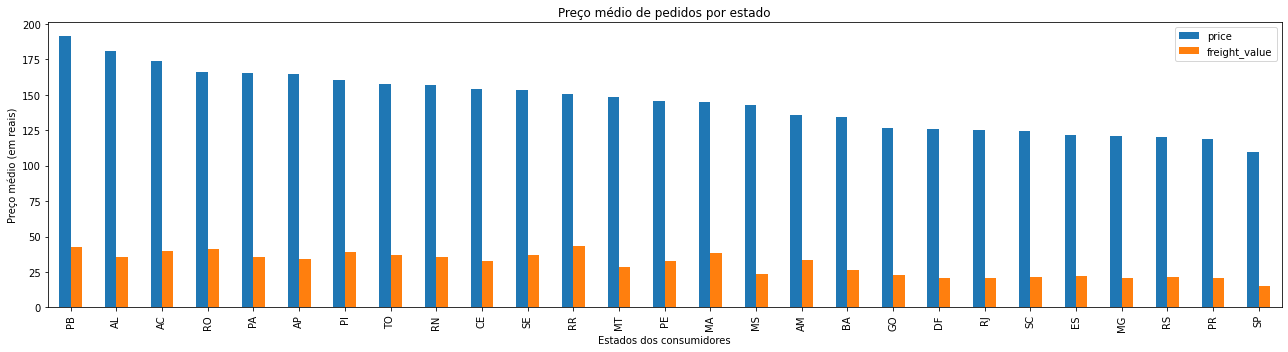

In [ ]:
# definindo as variáveis para o gráfico

orders_graph = orders.groupby(['customer_state']).mean().sort_values(by=['price'], ascending=False)

# adicionando atributos ao gráfico

fig, ax= plt.subplots(figsize=(18,5))
fig.set_facecolor('xkcd:white')
orders_graph.plot(kind='bar',ax=ax)
ax.set_title('Preço médio de pedidos por estado')
ax.set_xlabel('Estados dos consumidores')
ax.set_ylabel('Preço médio (em reais)')
ax.set_facecolor('xkcd:white')
plt.tight_layout()

Podemos ver que neste dataset o estado que tem a maior média de gastos com produtos é a Paraíba, seguido de diversos estados do Norte e Nordeste brasileiro. Isso pode indicar que estas regiões tendem a gastar em produtos mais caros no e-commerce por serem regiões com fretes mais caros, fazendo "valer" o custo. Esse tipo de informação pode auxiliar um gestor em uma tomada de decisão quanto aos investimentos em logística e infraestrutura de um e-commerce, a depender do tipo de produto que ele costuma vender. Expandiremos a análise de custos por produto mais adiante. De forma complementar, é possível ver de modo geral que os custos de frete são superiores em estados que não estejam no eixo Sul-Sudeste.

Iremos agora agrupar os valores de preço e frete por categoria de produto. Para isso usaremos duas tabelas: a `orders` e a `products` através de um *merge*. Essa função da biblioteca pandas une colunas de dois datasets a partir de um valor-chave em comum, semelhante ao *join* do SQL. No caso de nossos datasets, o dado em comum é a coluna *product_id*.  Utilizaremos o argumento *left* para indicar ao python que queremos que ele retorne todos os valores da tabela products que existam na tabela orders e o argumento *on* será o "elo" de ligação entre as duas tabelas. É importante se tenha ciência da ordem de seleção das tabelas e a forma que será feito o join para que se tenha um novo dataset que atenda às especificações desejadas.

In [ ]:
# realizando o join entre as tabelas
join= pd.merge(orders, products, how='left', on='product_id')

# analizando o resultado através do comando head

join.head()

,order_id,product_id,seller_id,customer_id,price,freight_value,order_delivered_customer_date,order_estimated_delivery_date,seller_city,seller_state,customer_city,customer_state,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,3ce436f183e68e07877b285a838db11a,58.90,13.29,2017-09-20 23:43:48,2017-09-29 00:00:00,volta redonda,SP,campos dos goytacazes,RJ,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,f6dd3ec061db4e3987629fe6b26e5cce,239.90,19.93,2017-05-12 16:04:24,2017-05-15 00:00:00,sao paulo,SP,santa fe do sul,SP,pet_shop
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,6489ae5e4333f3693df5ad4372dab6d3,199.00,17.87,2018-01-22 13:19:16,2018-02-05 00:00:00,borda da mata,MG,para de minas,MG,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,d4eb9395c8c0431ee92fce09860c5a06,12.99,12.79,2018-08-14 13:32:39,2018-08-20 00:00:00,franca,SP,atibaia,SP,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,58dbd0b2d70206bf40e62cd34e84d795,199.90,18.14,2017-03-01 16:42:31,2017-03-17 00:00:00,loanda,PR,varzea paulista,SP,ferramentas_jardim


Vamos analisar o preço médio de pedidos e fretes por estado e por categoria de produto abaixo com o novo dataset que geramos através do *join*:

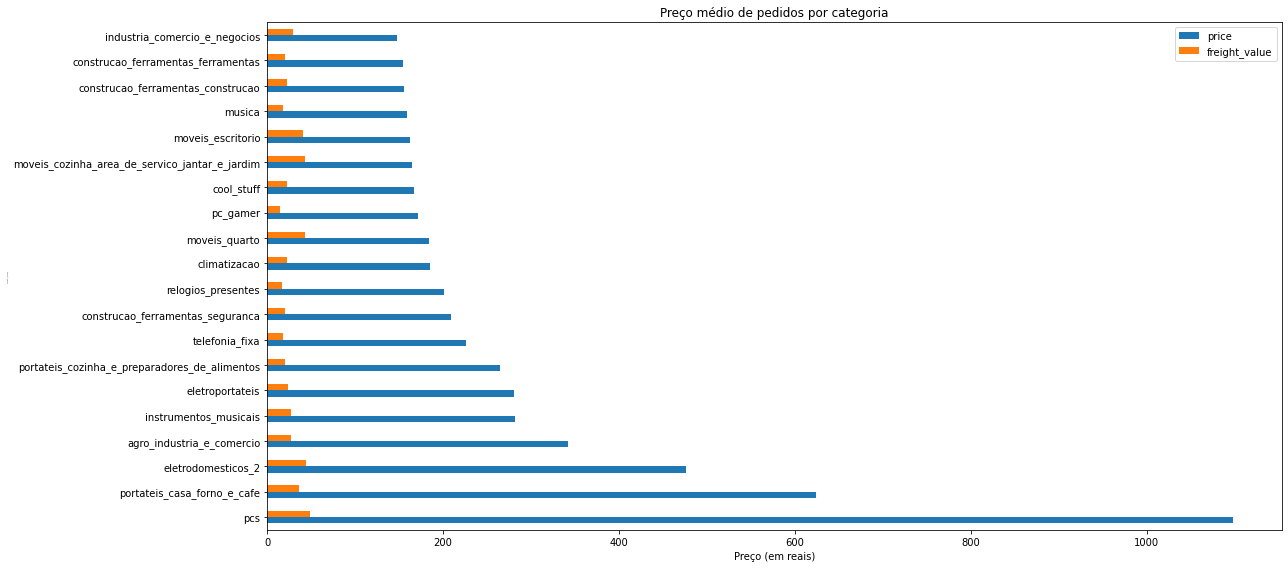

In [ ]:
# gerando as variáveis

graph= join.groupby(['product_category_name']).mean().sort_values(by=['price'], ascending=False).head(20)

# definindo parâmetros básicos para plotar os gráficos

fig, ax = plt.subplots(figsize=(18,8))

# plotando o primeiro gráfico

graph.plot(kind='barh',ax=ax)
ax.set_title('Preço médio de pedidos por categoria')
ax.set_xlabel('Preço (em reais)')
ax.yaxis.label.set_fontsize(1)
ax.set_ylabel('Preço médio (em reais)')
ax.set_facecolor('xkcd:white')
fig.set_facecolor('xkcd:white')

#utilizando o tight_layout para aproveitar todos os espaços no gráfico

plt.tight_layout()

Como disposto no gráfico, a categoria que tem a maior média de preços é `pcs/pc_gamer`, o que faz sentido por se tratar de um produto composto de outros produtos que também tem um *ticket* alto. Condizente com as restrições logísticas de dimensões e peso, as categorias de móveis e eletrodomésticos são as que possuem os maiores valores médios de frete. 

E como são distribuídos os pedidos por estados?

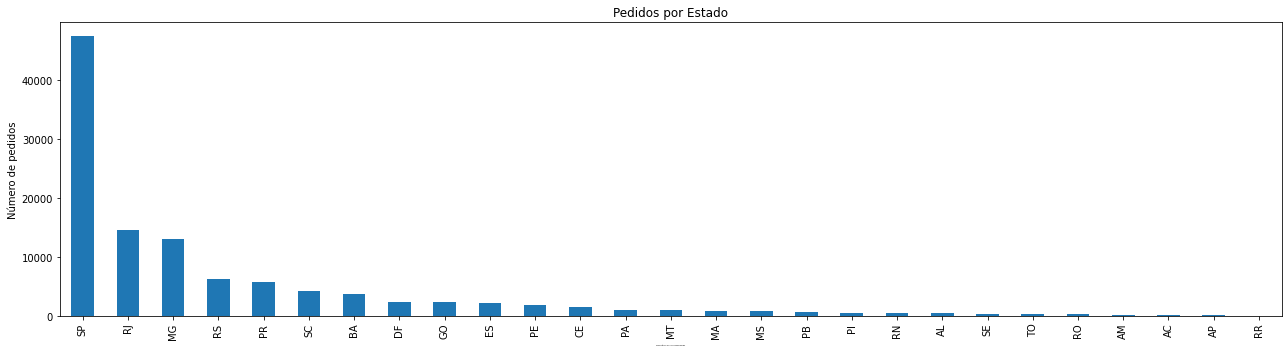

In [ ]:
# definindo variável que armazenará os valores acumulados por Estado

graph3 = orders.customer_state.value_counts()

#plotando o gráfico
fig,ax= plt.subplots(figsize=(18,5))
graph3.plot(kind='bar', ax=ax)
ax.set_title('Pedidos por Estado')
ax.set_xlabel('Municípios dos consumidores')
ax.xaxis.label.set_fontsize(2)
ax.set_ylabel('Número de pedidos')
ax.set_facecolor('xkcd:white')
fig.set_facecolor('xkcd:white')

plt.tight_layout()

São Paulo se sobresai, tendo quase o triplo de pedidos do segundo colocado, Rio de Janeiro. Isso indica que é um mercado com um e-commerce mais consolidado, contudo este dado também pode ser interpretado como fruto da alta concentração demográfica do estado.

Vejamos agora o total de pedidos agrupados por estado do vendedor e do comprador. São dados interessantes para se analisar onde estão concentradas as demandas, tanto na parte de entrada de produtos (compradores) quanto na parte de saída (vendedores).

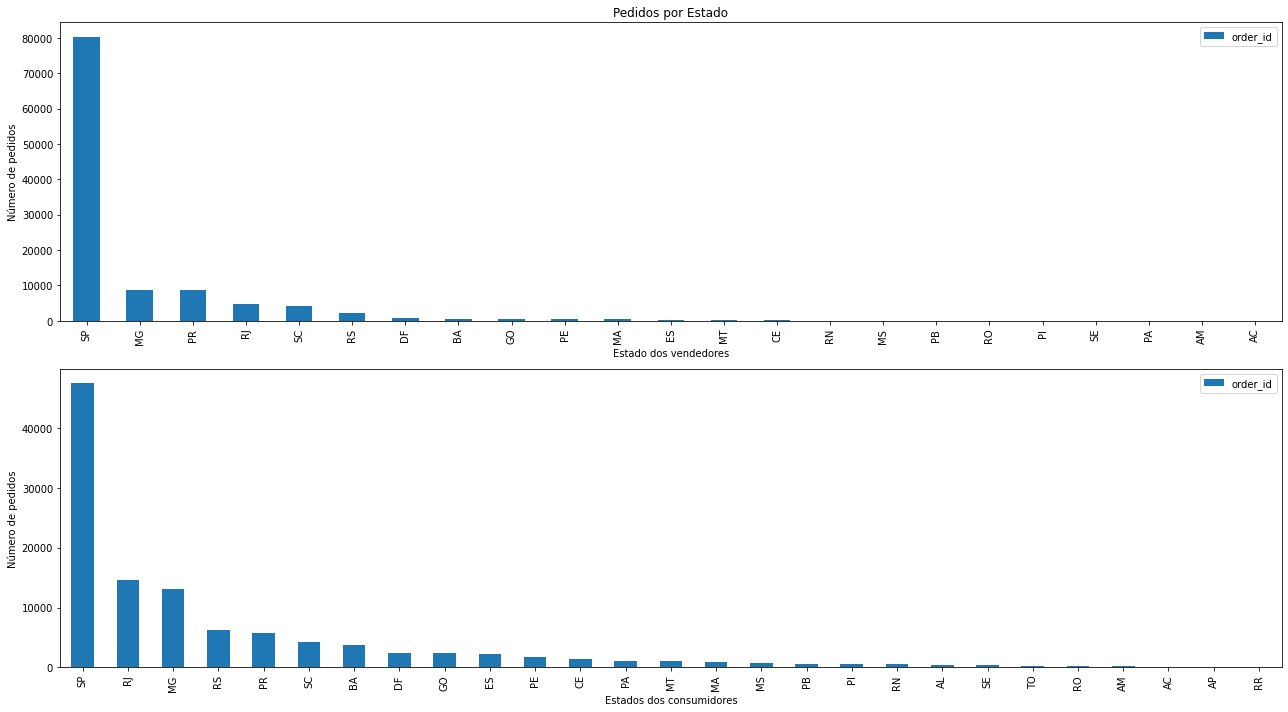

In [ ]:
# Definindo as variáveis que trarão os números totais de pedidos por estado do vendedor e do comprador

group_seller_state= orders.loc[:,['order_id','seller_state']].groupby('seller_state').count().sort_values(by=['order_id'], ascending=False)

group_customer_state= orders.loc[:,['order_id','customer_state']].groupby('customer_state').count().sort_values(by=['order_id'], ascending=False)


# Plotando um gráfico duplo para os dados agrupados acima

fig, (ax1, ax2)= plt.subplots(nrows=2, ncols=1,figsize=(18,10))

group_seller_state.plot(kind='bar',ax=ax1)
ax1.set_title('Pedidos por Estado')
ax1.set_xlabel('Estado dos vendedores')
ax1.set_ylabel('Número de pedidos')
ax1.set_facecolor('xkcd:white')
fig.set_facecolor('xkcd:white')

plt.tight_layout()

# Segundo Gráfico

group_customer_state.plot(kind='bar',ax=ax2)
ax2.set_xlabel('Estados dos consumidores')
ax2.set_ylabel('Número de pedidos')
ax2.set_facecolor('xkcd:white')
fig.set_facecolor('xkcd:white')
plt.tight_layout()

Como podemos ver, mais uma vez São Paulo detêm o posto de estado que mais realiza o envio e recebimento de produtos, tendo no agrupamento por vendedores uma quantidade quase 8 vezes maior que a do segundo colocado, Rio de Janeiro. No agrupamento por consumidores, vemos que o eixo Sul-Sudeste lidera.

Testaremos agora a correlação entre preço do produto e valor do frete, isto é, verificaremos através de métodos estatísticos disponíveis na biblioteca pandas se o valor do produto por si só impacta no valor do frete de forma significativa:

In [ ]:
# Definindo a variável que receberá os valores float para verificar a correlação

x = orders.loc[:,['price','freight_value']]

# Apresentação dos valores
print("Correlação com método Pearson:")
print(x.corr(method='pearson'),'\n')

print("Correlação com método Spearman:")
print(x.corr(method='spearman'),'\n')

print("Correlação com método Kendall:")
print(x.corr(method='kendall'),'\n')

Correlação com método Pearson:
                  price  freight_value
price          1.000000       0.414204
freight_value  0.414204       1.000000 

Correlação com método Spearman:
                 price  freight_value
price          1.00000        0.43419
freight_value  0.43419        1.00000 

Correlação com método Kendall:
                  price  freight_value
price          1.000000       0.300516
freight_value  0.300516       1.000000 



Podemos ver que há baixa correlação entre os valores de preço do produto e frete entre todos os métodos de análise de correlação (`0,414`, `0,434` e `0,30`) o que significa que o valor do produto não afeta diretamente no preço do frete. No dataset apresentado, o método de correlação mais confiável para basearmos nossa análise é o Spearman, visto que ele:

* Mantém as suposições do modelo de Pearson, que é o mais difundido na elaboração de correlações;

* E adicionalmente não depende da normalidade na distribuição dos dados - no caso do dataset apresentado há a ocorrência de *outliers* nos preços dos produtos;


#Conclusões

A partir da análise aqui apresentada, podemos tirar alguns *insights* interessantes sobre o mercado de ecommerce no Brasil entre 2016 e 2018:

* Os estados da região Sudeste gastam, na média, menos quando comparados aos estados de outras regiões, mas compram em maior quantidade;
* A região com maior movimentação de encomendas é a Sudeste, tendo São Paulo como máximo nas análises de compra e venda entre estados;
* Estados do Norte e Nordeste tem o frete mais caro do país, em contrapartida são os Estados que tem a maior média de preço por produto;
* PCs lidera o preço médio dos produtos por categoria;
* Móveis e eletrodomésticos possuem o maior preço médio de frete em todos os estados. Isso pode indicar a complexidade logística no transporte dos produtos destas categorias;
* Não há correlação significativa entre os preços de produtos e o valor do frete.

